# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
# %matplotlib inline

# from IPython.core.pylabtools import figsize


# figsize(12, 8)

# sns.set()

## Parte 1

### _Setup_ da parte 1

In [3]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

dataframe.head(5)

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


## Inicie sua análise a partir da parte 1 a partir daqui

In [4]:
dataframe.describe()

,normal,binomial
count,10000.000000,10000.000000
mean,19.991456,20.097000
std,4.013850,4.041191
min,4.310399,6.000000
25%,17.309638,17.000000
50%,19.989620,20.000000
75%,22.684324,23.000000
max,35.704951,36.000000


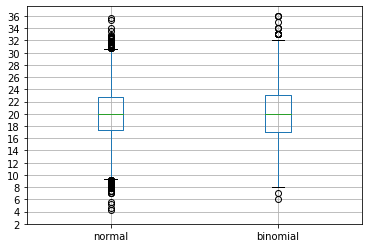

In [5]:
# Sua análise da parte 1 começa aqui.
dataframe.plot(kind="box", grid=True, yticks=np.arange(2, 38, 2.0))

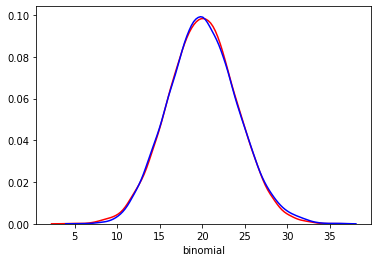

In [6]:
sns.distplot(dataframe["normal"], color="red",hist=False)
sns.distplot(dataframe["binomial"], color="blue", hist=False)

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [7]:
def q1():
    # Retorne aqui o resultado da questão 1.
    _quartis = dataframe.quantile(q=[0.25, 0.5, 0.75]).transpose().to_numpy()[:]
    
    quartis = {
        "quartil_normal": _quartis[0],
        "quartil_binomial": _quartis[1]
    }
    
    return tuple( np.around(quartis["quartil_normal"] - quartis["quartil_binomial"], 3) ) 

q1()

(0.31, -0.01, -0.316)

Para refletir:

* Você esperava valores dessa magnitude?

Sim, era esperado um valor baixo, por conta do tamanho de registros.

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

Distribuição discreta e contínua tendem a ser aproxima quanto maior for o numero de registros.

In [26]:
_low_number_data = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=50),
                     "binomial": sct.binom.rvs(100, 0.2, size=50)})

_mid_number_data = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=500),
                     "binomial": sct.binom.rvs(100, 0.2, size=500)})

_high_number_data = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=50000),
                     "binomial": sct.binom.rvs(100, 0.2, size=50000)}) 

def calc_diff_quantile(data):
    _quartis = data.quantile(q=[0.25, 0.5, 0.75]).transpose().to_numpy()[:]
    
    quartis = {
        "quartil_normal": _quartis[0],
        "quartil_binomial": _quartis[1]
    }
    
    return tuple( np.around(quartis["quartil_normal"] - quartis["quartil_binomial"], 3) )


print(f"""
    _low_number_data = ${calc_diff_quantile(_low_number_data)}
    _mid_number_data = ${calc_diff_quantile(_mid_number_data)}
    _high_number_data = ${calc_diff_quantile(_high_number_data)}
    """
     )


    _low_number_data = $(-0.184, -0.958, -0.501)
    _mid_number_data = $(0.616, 0.215, -0.464)
    _high_number_data = $(0.282, -0.01, -0.285)
    


## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [8]:
def q2():
    # Retorne aqui o resultado da questão 2.
    _std = dataframe["normal"].std()
    _media = dataframe["normal"].mean() 
    
    intervalo_normal = [
        _media - _std,
        _media + _std
    ]
    
    ecdf_normal = ECDF(dataframe["normal"])
    
    return float(( abs(ecdf_normal(intervalo_normal[0]) - ecdf_normal(intervalo_normal[1])) ).round(3))

q2()

0.684

Para refletir:

* Esse valor se aproxima do esperado teórico?

Sim! dentro do padrões de probabilidade de uma distrubuição Gaussiana.
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

$[\bar{x} - 2s, \bar{x} + 2s]$ irá cair num valor aproximado de 95%.

$[\bar{x} - 3s, \bar{x} + 3s]$ irá cair num valor aproximado de 98%.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [9]:
def q3():
    # Retorne aqui o resultado da questão 3.
    binomial = {
        "media": dataframe["binomial"].mean(),
        "std": dataframe["binomial"].var()
    }
    
    normal = {
        "media": dataframe["normal"].mean(),
        "std": dataframe["normal"].var()
    }
    
    return tuple([
                np.around(binomial["media"] - normal["media"], 3),
                np.around(binomial["std"] - normal["std"], 3)
            ])

q3()

(0.106, 0.22)

Para refletir:

* Você esperava valore dessa magnitude?

Sim, por conta da aproximação da distrubuição com a quantidade de registros > 30.
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

A diminuição tende a causa maiores diferenças de valores, enquanto a elevação do numero tende a causa maior aproximação.

In [33]:
_low_number_data = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10),
                     "binomial": sct.binom.rvs(100, 0.2, size=10)})

_mid_number_data = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=100),
                     "binomial": sct.binom.rvs(100, 0.2, size=100)})

_high_number_data = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=1000),
                     "binomial": sct.binom.rvs(100, 0.2, size=1000)}) 


def calc_diff_quantile(data):
    binomial = {
        "media": data["binomial"].mean(),
        "std": data["binomial"].var()
    }
    
    normal = {
        "media": data["normal"].mean(),
        "std": data["normal"].var()
    }
    
    return tuple([
                np.around(binomial["media"] - normal["media"], 3),
                np.around(binomial["std"] - normal["std"], 3)
            ])


print(f"""
    _low_number_data = ${calc_diff_quantile(_low_number_data)}
    _mid_number_data = ${calc_diff_quantile(_mid_number_data)}
    _high_number_data = ${calc_diff_quantile(_high_number_data)}
    """
     )


    _low_number_data = $(-1.127, 4.317)
    _mid_number_data = $(-0.887, 2.038)
    _high_number_data = $(-0.209, 0.992)
    


## Parte 2

### _Setup_ da parte 2

In [10]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [11]:
# Sua análise da parte 2 começa aqui.
stars.describe()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000
mean,111.078321,46.549021,0.477897,1.770417,12.614926,26.326918,8.303574,104.859419
std,25.652705,6.843040,1.064056,6.168058,29.473637,19.471042,4.506217,106.517270
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.375426,0.027108,-0.188528,1.923077,14.437330,5.781485,34.957119
50%,115.078125,46.946435,0.223241,0.198736,2.801839,18.459977,8.433872,83.068996
75%,127.085938,51.022887,0.473349,0.928206,5.464883,28.428152,10.702973,139.310905
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837


In [12]:
stars.head(6)

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False
5,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,False


## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.


Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [13]:
#global pois vai ser usado no def q4() e q5()
#1.
_filtered_false_pulsar = stars[stars["target"] == False]["mean_profile"]
#2.
false_pulsar_mean_profile_standardized = (_filtered_false_pulsar - _filtered_false_pulsar.mean()) / _filtered_false_pulsar.std()

In [36]:
def q4():
    # Retorne aqui o resultado da questão 4.
    #3.
    _quartis = sct.norm.ppf([0.8, 0.9, 0.95])
    #4.
    ecdf = ECDF(false_pulsar_mean_profile_standardized)
    resultado_ecdf = ecdf(_quartis)
    
    print(f"""
        Resultado:
            _quartis = {_quartis}
            resultado_ecdf = {resultado_ecdf}
            média false_pulsar_mean_profile_standardized = {false_pulsar_mean_profile_standardized.mean()}
            std false_pulsar_mean_profile_standardized = {false_pulsar_mean_profile_standardized.std()}
          """)
    
    return tuple(np.around(resultado_ecdf, 3))
    
q4()


        Resultado:
            _quartis = [0.84162123 1.28155157 1.64485363]
            resultado_ecdf = [0.80557264 0.91056711 0.95878952]
            média false_pulsar_mean_profile_standardized = 2.3556558898677207e-16
            std false_pulsar_mean_profile_standardized = 0.9999999999999999
          


(0.806, 0.911, 0.959)

Para refletir:

* Os valores encontrados fazem sentido?

Sim, representam a possibilidade dos numeros encontrados da faixa de probabilidade de uma distrubuição Gaussiana com std = 1 e media = 0 na distruição da variável false_pulsar_mean_profile_standardized.
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

Pela aproximação de resultado com a distrubuição normal, a variável foi padrozinada com sucesso com valores bem proximo de uma distrubuição normal perfeita.

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [15]:
def q5():
    # Retorne aqui o resultado da questão 5.
    _quartis_distr_normal = sct.norm.ppf([0.25, 0.5, 0.75]) 
    
    _quartis_distr_aux = false_pulsar_mean_profile_standardized.quantile([0.25, 0.5, 0.75]).to_numpy()
    
    print(f"""
        quartis_distr_normal = {_quartis_distr_normal}
        quartis_distr_aux = {_quartis_distr_aux} 
    """)
    
    return tuple(np.around(_quartis_distr_aux - _quartis_distr_normal, 3))

q5()


        quartis_distr_normal = [-0.67448975  0.          0.67448975]
        quartis_distr_aux = [-0.64715318  0.03985947  0.67065487] 
    


(0.027, 0.04, -0.004)

Para refletir:

* Os valores encontrados fazem sentido?

Sim, como visto na questão 4, o dado se encontra padrozinado tão próximo a uma média de = 0 e std = 1 perfeitos.
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

Pela aproximação de resultado com a distrubuição normal, a variável foi padrozinada com sucesso com valores bem proximo de uma distrubuição normal perfeita.
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.